In [30]:
import pandas as pd

In [31]:
df = pd.read_csv('100_data_math500.csv')

In [32]:
df['subject'].value_counts()

subject
Algebra                   25
Intermediate Algebra      19
Prealgebra                18
Precalculus               14
Number Theory             11
Geometry                   7
Counting & Probability     6
Name: count, dtype: int64

In [33]:
df['level'].value_counts()

level
2    25
5    23
4    22
3    19
1    11
Name: count, dtype: int64

In [34]:
example_problems = df.groupby('level').agg({
    'problem': 'first',  # Takes the first problem in each group
    'subject': 'first'   # Also shows the subject for context
}).reset_index()

example_problems

,level,problem,subject
0,1,Suppose $\sin D = 0.7$ in the diagram below. W...,Precalculus
1,2,"Convert the point $(0,3)$ in rectangular coord...",Precalculus
2,3,"If $f(x) = \frac{3x-2}{x-2}$, what is the valu...",Algebra
3,4,"The set of points $(x,y,z)$ that satisfy\n\[2x...",Precalculus
4,5,Define\n\[p = \sum_{k = 1}^\infty \frac{1}{k^2...,Intermediate Algebra


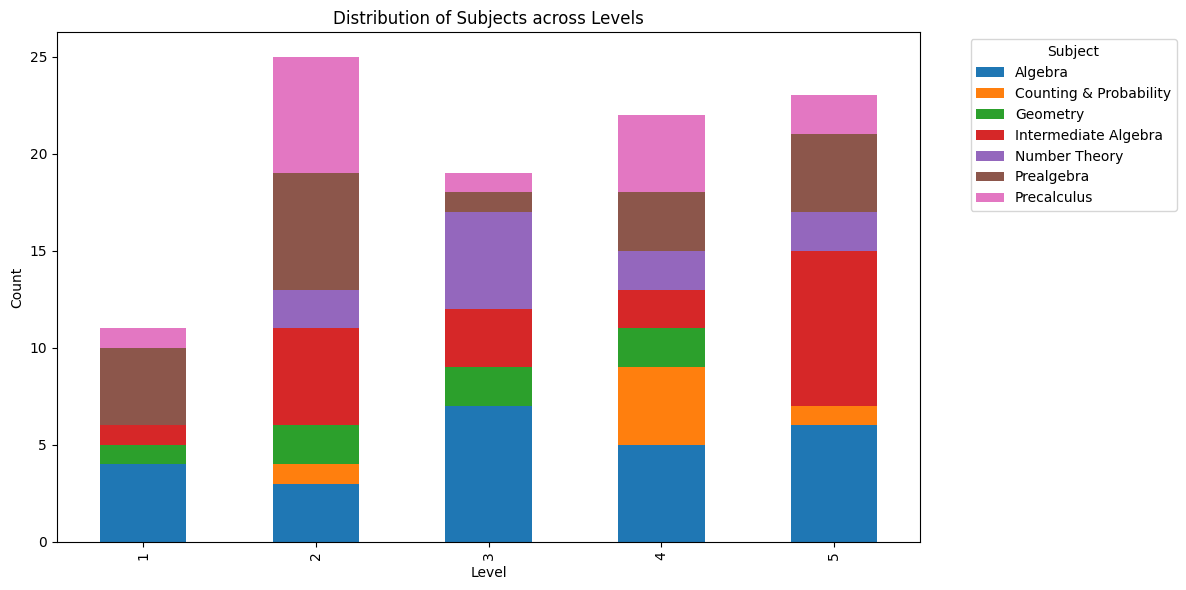

In [35]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of level and subject
level_subject_dist = pd.crosstab(df['level'], df['subject'])

# Create a stacked bar chart
ax = level_subject_dist.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the chart
plt.title('Distribution of Subjects across Levels')
plt.xlabel('Level')
plt.ylabel('Count')
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('level_subject_distribution.png', 
            dpi=300,              # Higher DPI for better quality
            bbox_inches='tight',  # Saves the figure with tight borders
            pad_inches=0.5)       # Add some padding around the plot

plt.show()  


In [36]:
example_problems.iloc[4]['problem']

'Define\n\\[p = \\sum_{k = 1}^\\infty \\frac{1}{k^2} \\quad \\text{and} \\quad q = \\sum_{k = 1}^\\infty \\frac{1}{k^3}.\\]Find a way to write\n\\[\\sum_{j = 1}^\\infty \\sum_{k = 1}^\\infty \\frac{1}{(j + k)^3}\\]in terms of $p$ and $q.$'

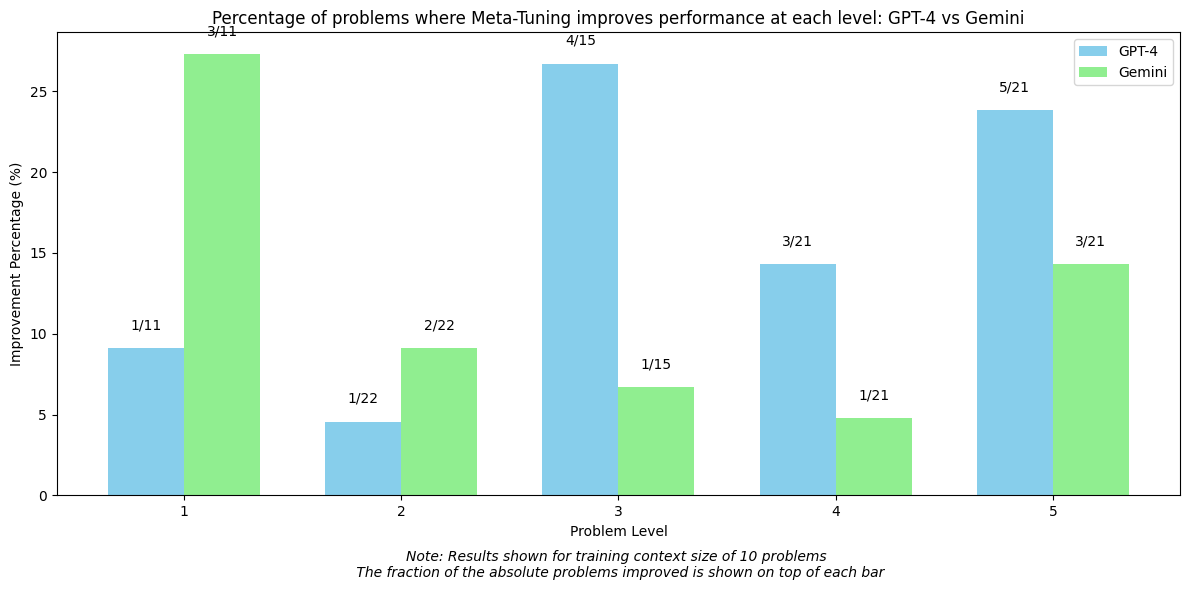

In [41]:
import numpy as np
# Load and process data for both models
df_gpt4o = pd.read_csv('gpt4o with context.csv')
df_gemini = pd.read_csv('gemini with context.csv')

# Calculate improvement percentages for both models
def calculate_improvement(df):
    improvement = df[
        (~df['is_correct']) & 
        (df['is_correct_test_10'])
    ].groupby('level').size()
    
    total = df[df['is_correct_test_10'].notna()].groupby('level').size()
    return (improvement / total * 100).round(2)

improvement_percentage_gpt4o = calculate_improvement(df_gpt4o)
improvement_percentage_gemini = calculate_improvement(df_gemini)

# Create a bar plot comparing the two models
plt.figure(figsize=(12, 6))
x = np.arange(len(improvement_percentage_gpt4o))
width = 0.35

plt.bar(x - width/2, improvement_percentage_gpt4o, width, label='GPT-4', color='skyblue')
plt.bar(x + width/2, improvement_percentage_gemini, width, label='Gemini', color='lightgreen')

plt.xlabel('Problem Level')
plt.ylabel('Improvement Percentage (%)')
plt.title('Percentage of problems where Meta-Tuning improves performance at each level: GPT-4 vs Gemini')
plt.xticks(x, improvement_percentage_gpt4o.index)
plt.legend()
plt.text(0.5, -0.15, 'Note: Results shown for training context size of 10 problems \n The fraction of the absolute problems improved is shown on top of each bar', 
         ha='center', va='center', transform=plt.gca().transAxes, 
         style='italic', fontsize=10)
# Add value labels on top of bars
def add_value_labels(df):
    improvement = df[
        (~df['is_correct']) & 
        (df['is_correct_test_10'])
    ].groupby('level').size()
    total = df[df['is_correct_test_10'].notna()].groupby('level').size()
    return improvement, total

gpt4o_imp, gpt4o_total = add_value_labels(df_gpt4o)
gemini_imp, gemini_total = add_value_labels(df_gemini)

for i, v in enumerate(improvement_percentage_gpt4o):
    plt.text(i - width/2, v + 1, f'{gpt4o_imp[i+1]}/{gpt4o_total[i+1]}', 
             ha='center', va='bottom')
    
for i, v in enumerate(improvement_percentage_gemini):
    plt.text(i + width/2, v + 1, f'{gemini_imp[i+1]}/{gemini_total[i+1]}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)
plt.show()